In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [3]:
renomeador = {
    "Periculosidade": {"p": "venenoso", "e": "comestível"},
    "Forma": {"b":"Bell", "c":"Conical", "x":"Convex","f":"Flat", "k":"Knobbed", "s":"Sunken"},
    "Formato chapéu": {"f": "fibrous", "g": "grooves", "y": "scaly", "s": "smooth"},
    "Cor chapéu": {"n":"Marrom", "b":"Buff", "c":"Cinanamon","g":"Cinza", "r":"Verde", "p":"Rosa", "u":"Roxo", "e":"Vermelho", "w":"Branco","y":"Amarelo"},
    "Machucada": {"t": "machucada", "f": "nao machucada"},
    "Odor": {"a":"Almond", "l":"Anise", "c":"Creosote","y":"Fishy", "f":"Foul", "m":"Musty","n":"none", "p":"Pungent", "s":"Spicy"},
    "Ligação Branquea": {"a": "Attached", "d": "Descending", "f": "Free", "n":"notched"},
    "Espaçamento Branquia": {"c": "Close", "w": "Crowded", "d": "Distant"},
    "Tamanho Branquia": {"b": "Broad", "n": "Narrow"},
    "Cor Branquia": {"k":"Black", "n":"Brown", "b":"Buff","h":"Chocolate", "g":"Gray", "r":"Green", "o":"Orange", "p":"Pink", "u":"Purple","e":"Red", "w": "White", "y": "Yellow"},
    "Stalk forma": {"e": "Enlarging", "t": "Tapering"},
    "Stalk raiz": {"b": "Bulbuos", "c": "Club","u": "Cup", "e": "Equal","z": "Rhizomorphs", "r": "Rooted", "?": "missing"},
    "Stalk superficie emcima do anel": {"f": "Fibrous", "y": "Scaly", "k": "Silky", "s": "Smooth"},
    "Stalk superficie embaixo do anel": {"f": "Fibrous", "y": "Scaly", "k": "Silky", "s": "Smooth"},
    "Stalk cor emcima do anel": {"k":"Black", "n":"Brown", "b":"Buff","h":"Chocolate", "g":"Gray", "r":"Green", "o":"Orange", "p":"Pink", "u":"Purple","e":"Red", "w": "White", "y": "Yellow"},
    "Stalk cor embaixo do anel": {"k":"Black", "n":"Brown", "b":"Buff","h":"Chocolate", "g":"Gray", "r":"Green", "o":"Orange", "p":"Pink", "u":"Purple","e":"Red", "w": "White", "y": "Yellow"},
    "Veil tipo": {"p": "Partipial", "u": "Universal"},
    "Veil cor": {"n": "Brown", "o": "Orange", "w": "White", "y": "Yellow"},
    "Numero Anel": {"n": "none", "o": "one", "t": "two"},
    "Tipo Anel": {"c": "Cobwebby", "e": "Evanescent", "f": "Flaring", "l": "Large", "n": "None", "p": "Pendant", "s": "Sheathing", "z": "Zone"},
    "Cor poro": {"k":"Black", "n":"Brown", "b":"Buff","h":"Chocolate", "g":"Gray", "r":"Green", "o":"Orange", "p":"Pink", "u":"Purple","e":"Red", "w": "White", "y": "Yellow"},
    "População": {"a": "Abundant", "c": "Clustered", "n": "Numerous", "s": "Scattered", "v": "Several", "y": "Solitary"},
    "Habitat": {"g":"grama","l":"folhas","m":"prados","p":"paths","u":"urbano","w":"waste","d":"madeira"},
}

In [4]:
def Limpeza():
    i = 0
    for nomeClasse,listaValores in renomeador.items():
        data.rename(columns={data.columns[i]:nomeClasse}, inplace=True)
        data[nomeClasse].replace(listaValores, inplace=True)
        i += 1

In [5]:
def Previsão(tipo,k,logistica=False):
    
    if logistica:
        model = tipo(solver='lbfgs',multi_class='auto',max_iter=1000)
    else:
        model = tipo()
    
    model.fit(X_treino,Y_treino);#
    
    model.score(X_teste,Y_teste);#
    
    Y_predict = model.predict(X_teste)#
    
    acertos=0#
    for i in range(len(X_teste)):#
        
        if Y_predict[i]==Y_teste.iloc[i]:#
            acertos+=1    #
        #else:
         #   print('Error',data.iloc[X_teste.index])
                    
    print()

    print()
    
    print('Numero de acertos:',acertos)
    
    erros = len(X_teste)-acertos
    print('Número de erros:',erros)
    
    print('Porcentagem de acertos: {:.2f}%'.format(acertos/len(X_teste)*100) )
    
    plt.pie([acertos,len(X_teste)-acertos],
            explode=[1,-.95],
            labels=[None,'Erros'], 
            colors=["#98FB98","#0B6623"]);
    
    plt.show()

In [6]:
data = pd.read_csv("mushrooms.csv"); Limpeza(); data[:5]

,Periculosidade,Forma,Formato chapéu,Cor chapéu,Machucada,Odor,Ligação Branquea,Espaçamento Branquia,Tamanho Branquia,Cor Branquia,...,Stalk superficie embaixo do anel,Stalk cor emcima do anel,Stalk cor embaixo do anel,Veil tipo,Veil cor,Numero Anel,Tipo Anel,Cor poro,População,Habitat
0,venenoso,Convex,smooth,Marrom,machucada,Pungent,Free,Close,Narrow,Black,...,Smooth,White,White,Partipial,White,one,Pendant,Black,Scattered,urbano
1,comestível,Convex,smooth,Amarelo,machucada,Almond,Free,Close,Broad,Black,...,Smooth,White,White,Partipial,White,one,Pendant,Brown,Numerous,grama
2,comestível,Bell,smooth,Branco,machucada,Anise,Free,Close,Broad,Brown,...,Smooth,White,White,Partipial,White,one,Pendant,Brown,Numerous,prados
3,venenoso,Convex,scaly,Branco,machucada,Pungent,Free,Close,Narrow,Brown,...,Smooth,White,White,Partipial,White,one,Pendant,Black,Scattered,urbano
4,comestível,Convex,smooth,Cinza,nao machucada,none,Free,Crowded,Broad,Black,...,Smooth,White,White,Partipial,White,one,Evanescent,Brown,Abundant,grama


In [7]:
# Método encontrado na internet/ busca na área de Kernels do dataset no Kaagle
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in data.columns:
    data[col] = labelencoder.fit_transform(data[col])

In [8]:
# características dos animais para o teste;
inputs = data.drop(columns=["Periculosidade"])
# resultado esperado;
target = data["Periculosidade"]
#separando dataframes teste e treino
X_treino,X_teste,Y_treino,Y_teste=tts(inputs,target,test_size=0.8)



Numero de acertos: 6492
Número de erros: 8
Porcentagem de acertos: 99.88%


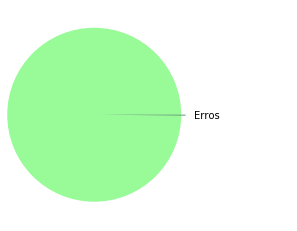

In [9]:
Previsão(DecisionTree,0)



Numero de acertos: 6169
Número de erros: 331
Porcentagem de acertos: 94.91%


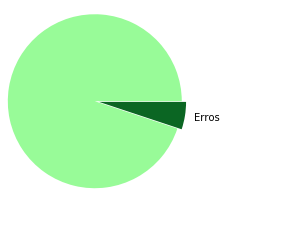

In [10]:
Previsão(LogisticRegression,0,logistica=True)



Numero de acertos: 5910
Número de erros: 590
Porcentagem de acertos: 90.92%


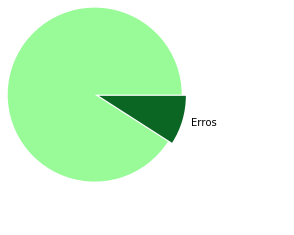

In [11]:
Previsão(BernoulliNB,0)



Numero de acertos: 4394
Número de erros: 2106
Porcentagem de acertos: 67.60%


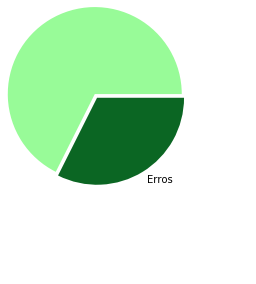

In [12]:
Previsão(GaussianNB,0)